In [1]:
! pip install audioperm

     |████████████████████████████████| 81 kB 3.5 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=8a0585ad9e3ddbf63e935c4b4add674f4425778cd6ebe2d0be3cd01e7beaf690
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


In [2]:
# get a sample audio
! wget https://github.com/zabir-nabil/audioperm/raw/main/tests/i_love_cats.m4a
! ls
import IPython
IPython.display.Audio("i_love_cats.m4a")

--2021-08-16 19:50:12--  https://github.com/zabir-nabil/audioperm/raw/main/tests/i_love_cats.m4a
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zabir-nabil/audioperm/main/tests/i_love_cats.m4a [following]
--2021-08-16 19:50:12--  https://raw.githubusercontent.com/zabir-nabil/audioperm/main/tests/i_love_cats.m4a
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106010 (104K) [audio/mp4]
Saving to: ‘i_love_cats.m4a’

i_love_cats.m4a     100%[===================>] 103.53K  --.-KB/s    in 0.02s   

2021-08-16 19:50:12 (4.91 MB/s) - ‘i_love_cats.m4a’ saved [106010/106010]

i_love_cats.m4a  sample_data

## **Word Segmentation**

In [3]:
from audioperm import AudioPerm
from audioperm.utils import save_audio

ap = AudioPerm("i_love_cats.m4a")
label = "i love cats"

words = ap.word_segments()
label_words = label.split()

for i, w in enumerate(words):
  save_audio(w, label_words[i] + ".wav")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [4]:
! ls

cats.wav  i_love_cats.m4a  i.wav  love.wav  sample_data


In [5]:
IPython.display.display(IPython.display.Audio("i.wav"))
IPython.display.display(IPython.display.Audio("love.wav"))
IPython.display.display(IPython.display.Audio("cats.wav"))

## **Permutation Generation (Augmentation)**

In [6]:
import numpy as np
from audioperm import AudioPerm
from audioperm.utils import save_audio

ap = AudioPerm("i_love_cats.m4a")
ap.word_segments(return_words=False)
perm_sentences = ap.permutations(5)

for i, s in enumerate(perm_sentences):
  print(s.shape)
  save_audio(s, f"perm_{i}.wav")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(123677,)
(123677,)
(123677,)
(123677,)
(123677,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
! ls

cats.wav	 i.wav	   perm_0.wav  perm_2.wav  perm_4.wav
i_love_cats.m4a  love.wav  perm_1.wav  perm_3.wav  sample_data


In [8]:
for pi in range(5):
  IPython.display.display(IPython.display.Audio(f"perm_{pi}.wav"))

In [9]:
# get another sample audio
! wget https://github.com/zabir-nabil/audioperm/raw/main/tests/bangla_demo.wav
! ls

--2021-08-16 19:53:19--  https://github.com/zabir-nabil/audioperm/raw/main/tests/bangla_demo.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zabir-nabil/audioperm/main/tests/bangla_demo.wav [following]
--2021-08-16 19:53:19--  https://raw.githubusercontent.com/zabir-nabil/audioperm/main/tests/bangla_demo.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200762 (196K) [audio/wav]
Saving to: ‘bangla_demo.wav’

bangla_demo.wav     100%[===================>] 196.06K  --.-KB/s    in 0.02s   

2021-08-16 19:53:19 (7.69 MB/s) - ‘bangla_demo.wav’ saved [200762/200762]

bangla_demo.wav  i.wav	     

## **Permutation Generation (multiple files)**

In [11]:
from audioperm import read_audio, word_segments, permutations

ap = read_audio(["bangla_demo.wav", "i_love_cats.m4a"])
out = word_segments(ap)
perms = permutations(out, n_permutations = 5)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


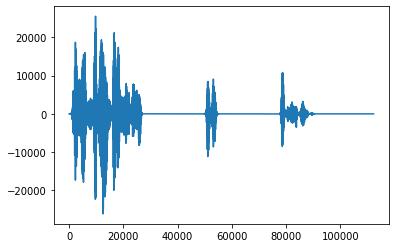

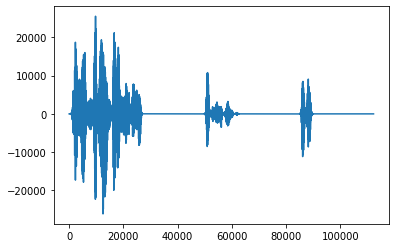

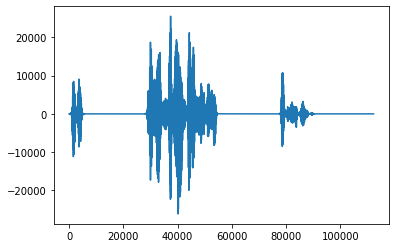

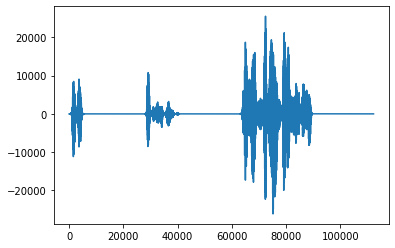

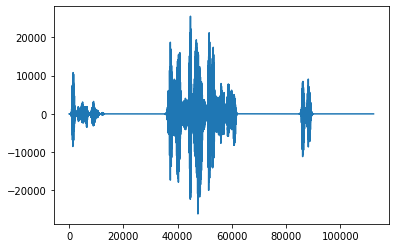

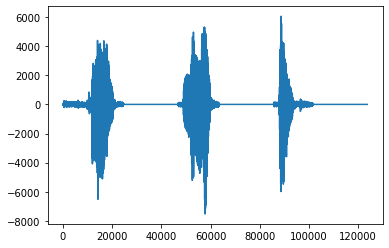

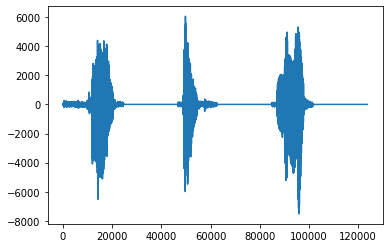

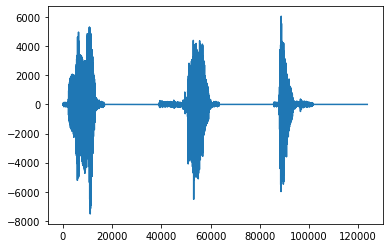

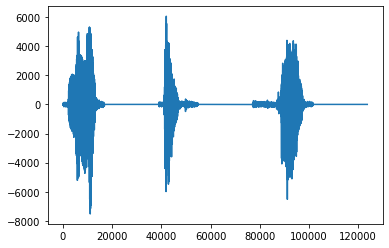

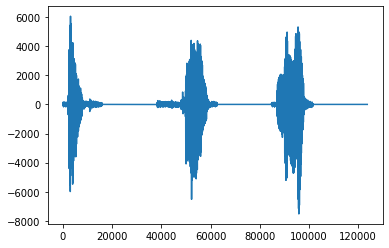

In [12]:
import matplotlib.pyplot as plt
for perm in perms:
  for s in perm:
    plt.plot(s)
    plt.show()

#### **Generate fixed length audible segments (permuted/augmented)**

In [14]:
from audioperm import fixed_len_segments

out = fixed_len_segments("bangla_demo.wav", return_segments = False, save_path = "fls_out", save = True, segment_size = 0.5)
print(out)

None


In [15]:
! ls

bangla_demo.wav  fls_out	  i.wav     perm_0.wav	perm_2.wav  perm_4.wav
cats.wav	 i_love_cats.m4a  love.wav  perm_1.wav	perm_3.wav  sample_data


In [16]:
% cd fls_out

/content/fls_out


In [17]:
! ls

bangla_demo_0.wav  bangla_demo_3.wav  bangla_demo_6.wav  bangla_demo_9.wav
bangla_demo_1.wav  bangla_demo_4.wav  bangla_demo_7.wav
bangla_demo_2.wav  bangla_demo_5.wav  bangla_demo_8.wav


In [18]:
% cd ../

/content


In [20]:
out = fixed_len_segments("bangla_demo.wav", return_segments = True, max_segments = 5, save = False, segment_size = 0.5)
print(len(out))

5
